In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Data read

In [2]:
#read data file
df = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedSubjects_new.csv')

print('Size of dataframe = ', df.shape)
df.head(5)


Size of dataframe =  (25759, 366)


/home/kali/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,58,97,346,361,363) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


PtID ParticipantFormType                                  Pt_InitTrt  \
0   3963                Self                   2.Pill(s)/Oral medication   
1   7428              Parent  1.Insulin given by injections, pen or pump   
2  15755              Parent  1.Insulin given by injections, pen or pump   
3   1489              Parent  1.Insulin given by injections, pen or pump   
4  12505                Self  1.Insulin given by injections, pen or pump   

  Pt_SevHypoEver Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  \
0           2.No                2.No             0              1.Pump   
1           2.No               1.Yes             1              1.Pump   
2           2.No               1.Yes             0              1.Pump   
3           2.No                2.No             0              1.Pump   
4          1.Yes                2.No             0              1.Pump   

   Pt_InsHumalog  Pt_InsNovolog  Pt_InsApidra  ...  InsLevemir  InsLantus  \
0            NaN            1.0           NaN  ...           0          0   
1            NaN            1.0           NaN  ...           0          0   
2            NaN            1.0           NaN  ...           0          0   
3            NaN            1.0           NaN  ...           0          0   
4            1.0            NaN           NaN  ...           0          0   

   InsOther  InsUnk  InsNotTaking  AgeAtConsent  DiagAge  \
0         0       0             0       36.0876       24   
1         1       0             0       10.1465        4   
2         1       0             0       10.1465        2   
3         1       0             0        9.1745        4   
4         0       0             0       58.1684       24   

   Pt_v3NumERVisOthReas  Pt_v3NumHospOthReas  Pt_v3NumSHSeizComa  
0                     0                    0                   0  
1                     0                    0                   0  
2                     0                    0                   0  
3                     0                    0                   0  
4                     0                    0                   0  

[5 rows x 366 columns]

#### Count null value percentage in each column

<AxesSubplot:>

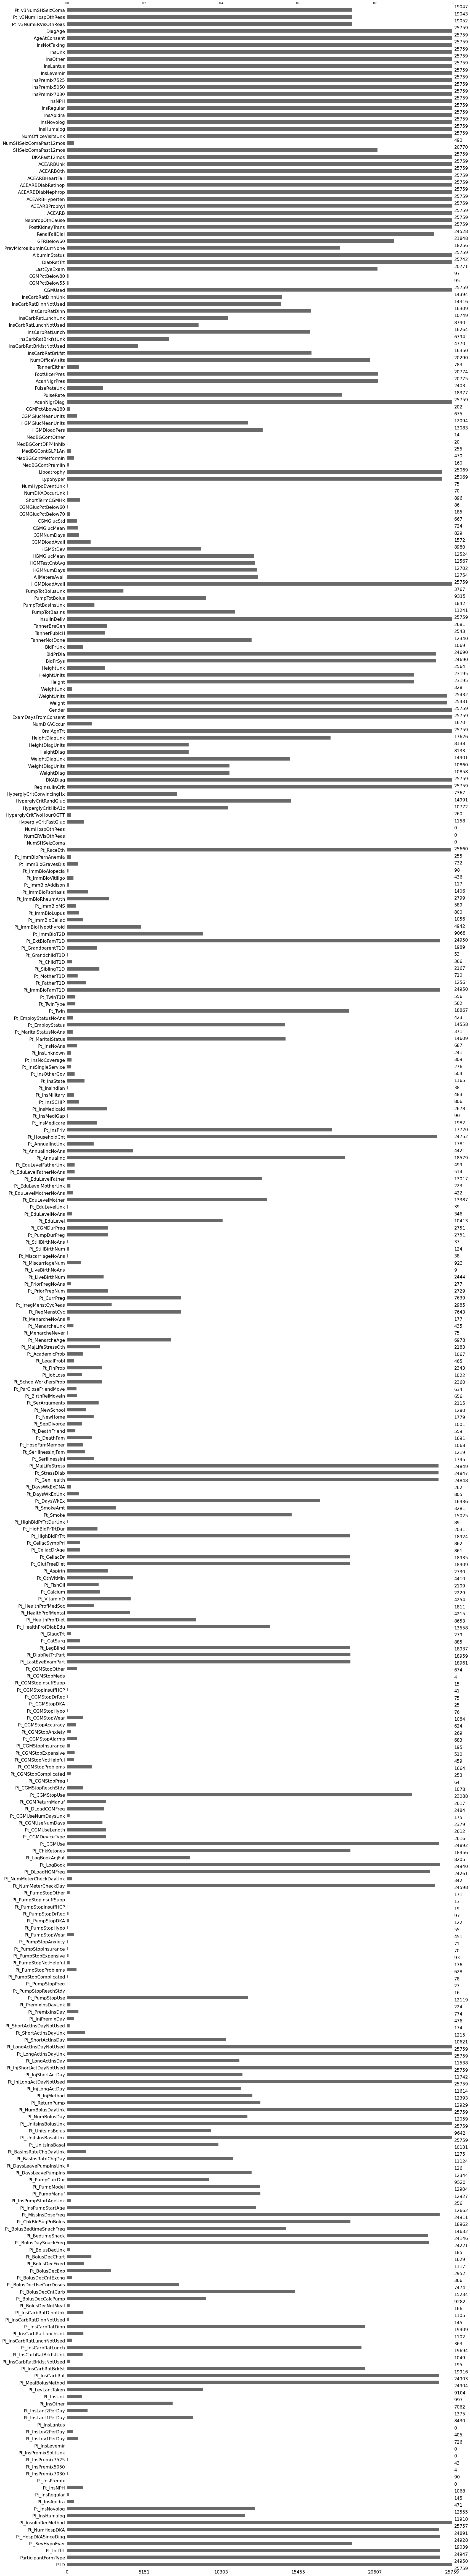

In [3]:
# missing values
import missingno as msno
msno.bar(df)

In [4]:
pd.options.display.max_rows = 100

def get_missing_val_percentage(df):
    return (df.isnull().sum()* 100 / len(df))


missing_per = get_missing_val_percentage(df)

# get missing values < threshold feature name list
variables = df.columns
thresh = 60
variable = [ ]
var = []
for i in range(df.columns.shape[0]):
    if missing_per[i]<= thresh: #setting the threshold as 40%
        variable.append(variables[i])
    else :
        var.append(variables[i])
        
print("variables missing vals < threshold")     
print(variable)
print("Length: ", len(variable))

print()
print("variables missing vals > threshold")     
print(var)
print("Length: ", len(var))

variables missing vals < threshold
['PtID', 'ParticipantFormType', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag', 'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_MealBolusMethod', 'Pt_InsCarbRat', 'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn', 'Pt_BolusDecCntCarb', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack', 'Pt_BolusBedtimeSnackFreq', 'Pt_ChkBldSugPriBolus', 'Pt_MissInsDoseFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf', 'Pt_PumpModel', 'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay', 'Pt_UnitsInsBasalUnk', 'Pt_UnitsInsBolusUnk', 'Pt_NumBolusDay', 'Pt_NumBolusDayUnk', 'Pt_ReturnPump', 'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjLongActDayNotUsed', 'Pt_InjShortActDay', 'Pt_InjShortActDayNotUsed', 'Pt_LongActInsDay', 'Pt_LongActInsDayUnk', 'Pt_LongActInsDayNotUsed', 'Pt_ShortActInsDay', 'Pt_PumpStopUse', 'Pt_NumMeterCheckDay', 'Pt_DLoadHGMFreq', 'Pt_LogBook', 'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_CGMStopUse', 'Pt_LastEyeExamPart', 'Pt_DiabRetT

In [5]:
def add_stress_column(row):
    if(row['Pt_MajLifeStress'] == '1.Yes' or row['Pt_HospFamMember'] == 1 or row['Pt_DeathFam'] == 1 or
           row['Pt_DeathFriend'] == 1 or row['Pt_SepDivorce'] == 1 or row['Pt_NewHome'] == 1 or
           row['Pt_NewSchool'] == 1 or row['Pt_ParCloseFriendMove'] == 1 or row['Pt_SchoolWorkPersProb'] == 1 or
           row['Pt_JobLoss'] == 1 or row['Pt_FinProb'] == 1 or row['Pt_LegalProbl'] == 1 or
           row['Pt_AcademicProb'] == 1 or row['Pt_MajLifeStressOth'] == 1):
        val = 1
    else:
        val = 0
    return val

df['MajorLifeStressEvent'] = df.apply(add_stress_column, axis=1)


In [6]:
# add HbA1C values from hba1c data table

df_hba1c = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedHbA1c_new.csv')

df_hba1c['mean_hba1c'] = df_hba1c['HbA1c'].groupby(df_hba1c['PtID']).transform('mean')

df_hba1c = df_hba1c.loc[df_hba1c.groupby(['PtID'])['HbA1cMonthsFromConsent'].idxmax()]

df["HbA1c"] = df_hba1c.merge(df, on="PtID")["mean_hba1c"]
df

PtID ParticipantFormType                                  Pt_InitTrt  \
0       3963                Self                   2.Pill(s)/Oral medication   
1       7428              Parent  1.Insulin given by injections, pen or pump   
2      15755              Parent  1.Insulin given by injections, pen or pump   
3       1489              Parent  1.Insulin given by injections, pen or pump   
4      12505                Self  1.Insulin given by injections, pen or pump   
...      ...                 ...                                         ...   
25754  19546              Parent  1.Insulin given by injections, pen or pump   
25755  21346                Self  1.Insulin given by injections, pen or pump   
25756  10925              Parent  1.Insulin given by injections, pen or pump   
25757  25922                Self  1.Insulin given by injections, pen or pump   
25758  18332                Self  1.Insulin given by injections, pen or pump   

      Pt_SevHypoEver Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  \
0               2.No                2.No             0              1.Pump   
1               2.No               1.Yes             1              1.Pump   
2               2.No               1.Yes             0              1.Pump   
3               2.No                2.No             0              1.Pump   
4              1.Yes                2.No             0              1.Pump   
...              ...                 ...           ...                 ...   
25754           2.No                2.No             0   2.Injections/pens   
25755          1.Yes                2.No             0              1.Pump   
25756           2.No                2.No             0   2.Injections/pens   
25757           2.No               1.Yes             0   2.Injections/pens   
25758           2.No                2.No             0              1.Pump   

       Pt_InsHumalog  Pt_InsNovolog  Pt_InsApidra  ...  InsOther  InsUnk  \
0                NaN            1.0           NaN  ...         0       0   
1                NaN            1.0           NaN  ...         1       0   
2                NaN            1.0           NaN  ...         1       0   
3                NaN            1.0           NaN  ...         1       0   
4                1.0            NaN           NaN  ...         0       0   
...              ...            ...           ...  ...       ...     ...   
25754            1.0            NaN           NaN  ...         0       0   
25755            1.0            NaN           NaN  ...         0       0   
25756            NaN            1.0           NaN  ...         0       0   
25757            NaN            1.0           NaN  ...         0       0   
25758            1.0            NaN           NaN  ...         0       0   

       InsNotTaking  AgeAtConsent  DiagAge  Pt_v3NumERVisOthReas  \
0                 0       36.0876       24                     0   
1                 0       10.1465        4                     0   
2                 0       10.1465        2                     0   
3                 0        9.1745        4                     0   
4                 0       58.1684       24                     0   
...             ...           ...      ...                   ...   
25754             0         8.282        7                     0   
25755             0       42.2669        8                     1   
25756             0        8.8925        8                     0   
25757             0       31.2416       29                     0   
25758             0       34.2286       20                     0   

       Pt_v3NumHospOthReas  Pt_v3NumSHSeizComa  MajorLifeStressEvent     HbA1c  
0                        0                   0                     0  7.675000  
1                        0                   0                     0  6.750000  
2                        0                   0                     0  7.807692  
3                        0                   0          

In [7]:
# def hba1c_value_condition_col(row):
#     if(row['HbA1c'] > 7.5 or  row['HbA1c'] < 7 ):
#         val = 1
#     else:
#         val = 0
#     return val

# df['HbA1C_SH'] = df.apply(hba1c_value_condition_col, axis=1)


df['HbA1C_SH'] = [1 if x<7 or x>7.5 else 0 for x in df['HbA1c']]
df

PtID ParticipantFormType                                  Pt_InitTrt  \
0       3963                Self                   2.Pill(s)/Oral medication   
1       7428              Parent  1.Insulin given by injections, pen or pump   
2      15755              Parent  1.Insulin given by injections, pen or pump   
3       1489              Parent  1.Insulin given by injections, pen or pump   
4      12505                Self  1.Insulin given by injections, pen or pump   
...      ...                 ...                                         ...   
25754  19546              Parent  1.Insulin given by injections, pen or pump   
25755  21346                Self  1.Insulin given by injections, pen or pump   
25756  10925              Parent  1.Insulin given by injections, pen or pump   
25757  25922                Self  1.Insulin given by injections, pen or pump   
25758  18332                Self  1.Insulin given by injections, pen or pump   

      Pt_SevHypoEver Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  \
0               2.No                2.No             0              1.Pump   
1               2.No               1.Yes             1              1.Pump   
2               2.No               1.Yes             0              1.Pump   
3               2.No                2.No             0              1.Pump   
4              1.Yes                2.No             0              1.Pump   
...              ...                 ...           ...                 ...   
25754           2.No                2.No             0   2.Injections/pens   
25755          1.Yes                2.No             0              1.Pump   
25756           2.No                2.No             0   2.Injections/pens   
25757           2.No               1.Yes             0   2.Injections/pens   
25758           2.No                2.No             0              1.Pump   

       Pt_InsHumalog  Pt_InsNovolog  Pt_InsApidra  ...  InsUnk  InsNotTaking  \
0                NaN            1.0           NaN  ...       0             0   
1                NaN            1.0           NaN  ...       0             0   
2                NaN            1.0           NaN  ...       0             0   
3                NaN            1.0           NaN  ...       0             0   
4                1.0            NaN           NaN  ...       0             0   
...              ...            ...           ...  ...     ...           ...   
25754            1.0            NaN           NaN  ...       0             0   
25755            1.0            NaN           NaN  ...       0             0   
25756            NaN            1.0           NaN  ...       0             0   
25757            NaN            1.0           NaN  ...       0             0   
25758            1.0            NaN           NaN  ...       0             0   

       AgeAtConsent  DiagAge  Pt_v3NumERVisOthReas  Pt_v3NumHospOthReas  \
0           36.0876       24                     0                    0   
1           10.1465        4                     0                    0   
2           10.1465        2                     0                    0   
3            9.1745        4                     0                    0   
4           58.1684       24                     0                    0   
...             ...      ...                   ...                  ...   
25754         8.282        7                     0                    0   
25755       42.2669        8                     1                    1   
25756        8.8925        8                     0                    0   
25757       31.2416       29                     0                    0   
25758       34.2286       20                     0                    0   

       Pt_v3NumSHSeizComa  MajorLifeStressEvent     HbA1c  HbA1C_SH  
0                       0                     0  7.675000         1  
1                       0                     0  6.750000         1  
2                       0             

In [8]:
import math

# convert lbs to kg

for i, row in df.iterrows():
    weight = row['Weight']
    unit = row['WeightDiagUnits']
    
    if (math.isnan(row['Weight'])):
        weight = weight
        unit = unit
    elif(row['WeightDiagUnits']=='lbs' or row['Weight']>180):
        weight = weight/2.2046
        unit = 'kg'
    df.at[i,'Weight'] = weight
    df.at[i,'WeightDiagUnits'] = unit


for i, row in df.iterrows():
    height = row['Height']
    unit = row['HeightDiagUnits']
    
    if (math.isnan(row['Height'])):
        height = height
        unit = unit
    elif(row['HeightDiagUnits']=='in' or row['Height']<50):
        height = height * 2.54
        unit = 'cm'
    else:
        height = height
        unit = unit
    df.at[i,'Height'] = height/100
    df.at[i,'HeightDiagUnits'] = unit


# def add_bmi(row):
#     if(math.isnan(row['Height']) or math.isnan(row['Weight'])):
#         val = row['Weight']
#     else:
#         val = row['Weight'] / (row['Height']**2)
#         print(row['DiagAge'], row['Weight'], row['WeightDiagUnits'], row['Height'])
    
#     return val

# df['bmi'] = df.apply(add_bmi, axis=1)

In [9]:
# df['bmi']

In [10]:
# add first degree relative with T1D column

def add_T1D_relative_column(row):
    if(row['Pt_TwinT1D'] == 1 or row['Pt_ImmBioFamT1D'] == 1 or row['Pt_FatherT1D'] == 1 or
           row['Pt_MotherT1D'] == 1 or row['Pt_SiblingT1D'] == 1 or row['Pt_ChildT1D'] == 1 or
           row['Pt_GrandchildT1D'] == 1 or row['Pt_GrandparentT1D'] == 1 or row['Pt_ExtBioFamT1D'] == 1):
        val = 1
    else:
        val = 0
    return val

df['relative_T1D'] = df.apply(add_T1D_relative_column, axis=1)


Drop columns that have high null value percentage

In [11]:
# Drop unwanted columns from initial enrolment data - 
cols_to_del = ['Pt_LevLantTaken', 'Pt_InsCarbRatBrkfstNotUsed','NumHypoEventUnk',
               'Pt_InsCarbRatBrkfstUnk', 'Pt_InsCarbRatLunchNotUsed', 'Pt_InsCarbRatLunchUnk',
               'Pt_InsCarbRatDinnNotUsed', 'Pt_InsCarbRatDinnUnk', 'Pt_BolusDecNotMeal',
               'Pt_BolusDecCalcPump', 'Pt_BolusDecUseCorrDoses', 'Pt_BolusDecCntExchg','NumOfficeVisitsUnk',
               'Pt_BolusDecExp', 'Pt_BolusDecFixed', 'Pt_BolusDecChart', 'Pt_BolusDecUnk',
               'Pt_InsPumpStartAgeUnk', 'Pt_PumpCurrDur', 'Pt_DaysLeavePumpInsUnk', 'Pt_BasInsRateChgDayUnk',
               'Pt_UnitsInsBasal', 'Pt_UnitsInsBolus', 'Pt_ShortActInsDayUnk', 'Pt_ShortActInsDayNotUsed', 
               'Pt_InjPremixDay', 'Pt_PremixInsDay', 'Pt_PremixInsDayUnk', 'Pt_PumpStopReschStdy',
               'Pt_PumpStopPreg', 'Pt_PumpStopComplicated', 'Pt_PumpStopProblems', 'Pt_PumpStopNotHelpful',
               'Pt_PumpStopExpensive', 'Pt_PumpStopInsurance', 'Pt_PumpStopAnxiety', 'Pt_PumpStopWear',
               'Pt_PumpStopHypo', 'Pt_PumpStopDKA', 'Pt_PumpStopDrRec', 'Pt_PumpStopInsuffHCP', 
               'Pt_PumpStopInsuffSupp', 'Pt_PumpStopOther', 'Pt_NumMeterCheckDayUnk', 'Pt_LogBookAdjFut',
               'Pt_CGMDeviceType', 'Pt_CGMUseLength', 'Pt_CGMUseNumDays', 'Pt_CGMUseNumDaysUnk',
               'Pt_DLoadCGMFreq', 'Pt_CGMReturnManuf', 'Pt_CGMStopReschStdy', 'Pt_CGMStopPreg',
               'Pt_CGMStopComplicated', 'Pt_CGMStopProblems', 'Pt_CGMStopNotHelpful', 'Pt_CGMStopExpensive',
               'Pt_CGMStopInsurance', 'Pt_CGMStopAlarms', 'Pt_CGMStopAnxiety', 'Pt_CGMStopAccuracy', 
               'Pt_CGMStopWear', 'Pt_CGMStopHypo', 'Pt_CGMStopDKA', 'Pt_CGMStopDrRec', 'Pt_CGMStopInsuffHCP',
               'Pt_CGMStopInsuffSupp', 'Pt_CGMStopMeds', 'Pt_CGMStopOther', 'Pt_CatSurg', 'Pt_GlaucTrt', 
               'Pt_HealthProfDiet', 'Pt_HealthProfMental', 'Pt_HealthProfMedSoc', 'Pt_VitaminD',
               'Pt_Calcium', 'Pt_FishOil', 'Pt_OthVitMin', 'Pt_Aspirin', 'Pt_CeliacDrAge', 'Pt_CeliacSympPri',
               'Pt_HighBldPrTrtDur', 'Pt_HighBldPrTrtDurUnk', 'Pt_DaysWkExUnk', 'Pt_DaysWkExDNA',
               'Pt_SerIllnessInj', 'Pt_SerIllnessInjFam', 'Pt_SerArguments', 'Pt_BirthRelMoveIn',
               'Pt_MenarcheNever', 'Pt_MenarcheUnk','Pt_MenarcheNoAns','Pt_PriorPregNum',
               'Pt_PriorPregNoAns', 'Pt_LiveBirthNum', 'Pt_LiveBirthNoAns', 'Pt_UnitsInsBasalUnk',
               'Pt_MiscarriageNoAns', 'Pt_StillBirthNum', 'Pt_StillBirthNoAns', 'Pt_PumpDurPreg', 
               'Pt_CGMDurPreg', 'Pt_EduLevelNoAns', 'Pt_EduLevelUnk', 'Pt_EduLevelMotherNoAns',
               'Pt_EduLevelMotherUnk', 'Pt_EduLevelFatherNoAns', 'Pt_EduLevelFatherUnk', 'Pt_AnnualIncNoAns',
               'Pt_AnnualIncUnk', 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
               'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
               'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns', 'Pt_MaritalStatusNoAns', 'Pt_EmployStatusNoAns',
               'Pt_TwinType', 'Pt_ImmBioT2D', 'Pt_ImmBioHypothyroid', 'Pt_ImmBioCeliac','Pt_LongActInsDayUnk',
               'Pt_ImmBioLupus', 'Pt_ImmBioMS', 'Pt_ImmBioRheumArth', 'Pt_ImmBioPsoriasis', 'Pt_ImmBioAddison', 
               'Pt_ImmBioVitiligo', 'Pt_ImmBioAlopecia', 'Pt_ImmBioGravesDis', 'Pt_ImmBioPernAnemia', 
               'NumERVisOthReas', 'NumHospOthReas', 'HyperglyCritFastGluc','Pt_UnitsInsBolusUnk',
               'HyperglyCritTwoHourOGTT', 'HyperglyCritConvincingHx', 'HeightDiag', 'HeightDiagUnits', 'WeightUnk', 'HeightUnk', 'BldPrUnk', 'TannerPubicH', 'TannerBreGen',
               'PumpTotBasInsUnk', 'PumpTotBolus', 'PumpTotBolusUnk', 'HGMStDev', 'CGMDloadAvail', 'CGMNumDays',
               'CGMGlucMean', 'CGMGlucStd', 'ShortTermCGMHx', 'WeightDiagUnits','InsCarbRatLunchUnk',
               'NumDKAOccurUnk', 'MedBGContPramlin', 'MedBGContMetformin', 'MedBGContGLP1An',
               'MedBGContDPP4Inhib', 'MedBGContOther', 'CGMGlucMeanUnits', 'CGMPctAbove180', 'PulseRateUnk', 
               'TannerEither', 'InsCarbRatBrkfstNotUsed', 'InsCarbRatBrkfstUnk', 'InsCarbRatLunchNotUsed', 'InsCarbRatDinnUnk',
               'WeightUnits', 'HeightUnits', 'HGMGlucMeanUnits', 'ParticipantFormType','ACEARBProphyl', 'ACEARBHyperten',
               'ACEARBDiabNephrop', 'ACEARBDiabRetinop', 'ACEARBHeartFail','HGMDloadAvail','HGMDloadPers','InsUnk',
               'ACEARBOth', 'ACEARBUnk','AllMetersAvail', 'HeightDiagUnk', 'WeightDiagUnk', 'Pt_UnitsInsBolusUnk',
               'Pt_MajLifeStress', 'Pt_HospFamMember', 'Pt_DeathFam', 'Pt_DeathFriend','Pt_SepDivorce','Pt_NewHome',
               'Pt_NewSchool','Pt_ParCloseFriendMove','Pt_SchoolWorkPersProb','Pt_JobLoss','Pt_FinProb','Pt_LegalProbl',
               'Pt_AcademicProb', 'Pt_MajLifeStressOth', 'Pt_TwinT1D', 'Pt_ImmBioFamT1D', 'Pt_FatherT1D', 'Pt_MotherT1D',
               'Pt_SiblingT1D', 'Pt_ChildT1D', 'Pt_GrandchildT1D', 'Pt_Twin', 'NumSHSeizComa', 'Pt_InsPremix',
               'Pt_InsPremix5050','Pt_InsPremixSplitUnk','Pt_InsLevemir', 'Pt_InsLantus',
               'Pt_GrandparentT1D', 'Pt_ExtBioFamT1D']


df.drop(cols_to_del, inplace=True, axis=1)
df.head(10)

PtID                                  Pt_InitTrt Pt_SevHypoEver  \
0   3963                   2.Pill(s)/Oral medication           2.No   
1   7428  1.Insulin given by injections, pen or pump           2.No   
2  15755  1.Insulin given by injections, pen or pump           2.No   
3   1489  1.Insulin given by injections, pen or pump           2.No   
4  12505  1.Insulin given by injections, pen or pump          1.Yes   
5   3100         3.Both pills and injections or pump           2.No   
6   2651                                         NaN            NaN   
7  26063                   2.Pill(s)/Oral medication           2.No   
8  10837                                5.Don't Know           2.No   
9   8084  1.Insulin given by injections, pen or pump           2.No   

  Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  Pt_InsHumalog  \
0                2.No             0              1.Pump            NaN   
1               1.Yes             1              1.Pump            NaN   
2               1.Yes             0              1.Pump            NaN   
3                2.No             0              1.Pump            NaN   
4                2.No             0              1.Pump            1.0   
5                2.No             0   2.Injections/pens            NaN   
6                 NaN           NaN   2.Injections/pens            NaN   
7                2.No             0              1.Pump            1.0   
8                2.No             0   2.Injections/pens            NaN   
9                2.No             0              1.Pump            NaN   

   Pt_InsNovolog  Pt_InsApidra  Pt_InsRegular  ...  InsNotTaking  \
0            1.0           NaN            NaN  ...             0   
1            1.0           NaN            NaN  ...             0   
2            1.0           NaN            NaN  ...             0   
3            1.0           NaN            NaN  ...             0   
4            NaN           NaN            NaN  ...             0   
5            1.0           NaN            NaN  ...             0   
6            NaN           NaN            NaN  ...             0   
7            NaN           NaN            NaN  ...             0   
8            1.0           NaN            NaN  ...             0   
9            1.0           NaN            NaN  ...             0   

   AgeAtConsent  DiagAge  Pt_v3NumERVisOthReas  Pt_v3NumHospOthReas  \
0       36.0876       24                     0                    0   
1       10.1465        4                     0                    0   
2       10.1465        2                     0                    0   
3        9.1745        4                     0                    0   
4       58.1684       24                     0                    0   
5       42.9514       32                     0                    0   
6       14.1383       14                   NaN                  NaN   
7       62.0507       48                     0                    0   
8       11.5455        4                     0                    0   
9       12.4682        2                     0                    0   

   Pt_v3NumSHSeizComa  MajorLifeStressEvent      HbA1c  HbA1C_SH relative_T1D  
0                   0                     0   7.675000         1            1  
1                   0                     0   6.750000         1            1  
2                   0                     0   7.807692         1            1  
3                   0                     0   7.535714         1            1  
4                   0                     1   7.633333         1            0  
5                   0                     0   8.766667         1            0  
6                 NaN                     0   6.955556         1            0  
7                   0                     0   7.208333         0            1  
8                   0                     1   8.125000         1            0  
9                   0                     0  10.000000         1            

In [12]:

df.columns.to_numpy()



array(['PtID', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag',
       'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_InsHumalog',
       'Pt_InsNovolog', 'Pt_InsApidra', 'Pt_InsRegular', 'Pt_InsNPH',
       'Pt_InsPremix7030', 'Pt_InsPremix7525', 'Pt_InsLev1PerDay',
       'Pt_InsLev2PerDay', 'Pt_InsLant1PerDay', 'Pt_InsLant2PerDay',
       'Pt_InsOther', 'Pt_InsUnk', 'Pt_MealBolusMethod', 'Pt_InsCarbRat',
       'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn',
       'Pt_BolusDecCntCarb', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack',
       'Pt_BolusBedtimeSnackFreq', 'Pt_ChkBldSugPriBolus',
       'Pt_MissInsDoseFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf',
       'Pt_PumpModel', 'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay',
       'Pt_NumBolusDay', 'Pt_NumBolusDayUnk', 'Pt_ReturnPump',
       'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjLongActDayNotUsed',
       'Pt_InjShortActDay', 'Pt_InjShortActDayNotUsed',
       'Pt_LongActInsDay', 'Pt_LongActInsDayNotUsed', 'Pt

# Add Other medical conditions

In [13]:
# read medical condition data
df_med = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedMedical Conditions_new.csv')


In [14]:
# get id list of patients having specific medical condition

def get_ids_of_condition(df, label):
    df_a = df[df[label]==True]
    df_a=df_a.drop_duplicates(subset="PtID",keep="first") 
    return df_a.PtID.tolist()


In [15]:
medical_conditions = ['CardiacAngio','CoronaryBypass','Hypertension','HighTrig','HighLDL','LowHDL','Stroke',
                      'Cardiomyopathy','CongHeartFail','AtrialFib','CardiacArrhyth','Hemoglob','RheumArth',
                      'Osteo','Depression','Anxiety','Psychosis', 'DiabNeuro']

def add_column(df,df_med, medical_conditions):
    for label in medical_conditions:
        patients_list = get_ids_of_condition(df_med, label)
        print("Count of patients with ",label,len(patients_list))
        df[label] = df['PtID'].isin(patients_list)
        
        # rename column labels
        new_label = label.replace(" ", "_") if (' ' in label) else label
        df.rename(columns={label:new_label}, inplace=True)
    return df

df = add_column(df,df_med, medical_conditions)


Count of patients with  CardiacAngio 105
Count of patients with  CoronaryBypass 177
Count of patients with  Hypertension 3475
Count of patients with  HighTrig 475
Count of patients with  HighLDL 2025
Count of patients with  LowHDL 213
Count of patients with  Stroke 74
Count of patients with  Cardiomyopathy 55
Count of patients with  CongHeartFail 79
Count of patients with  AtrialFib 58
Count of patients with  CardiacArrhyth 76
Count of patients with  Hemoglob 16
Count of patients with  RheumArth 177
Count of patients with  Osteo 471
Count of patients with  Depression 1751
Count of patients with  Anxiety 692
Count of patients with  Psychosis 75
Count of patients with  DiabNeuro 1074


In [16]:
df

PtID                                  Pt_InitTrt Pt_SevHypoEver  \
0       3963                   2.Pill(s)/Oral medication           2.No   
1       7428  1.Insulin given by injections, pen or pump           2.No   
2      15755  1.Insulin given by injections, pen or pump           2.No   
3       1489  1.Insulin given by injections, pen or pump           2.No   
4      12505  1.Insulin given by injections, pen or pump          1.Yes   
...      ...                                         ...            ...   
25754  19546  1.Insulin given by injections, pen or pump           2.No   
25755  21346  1.Insulin given by injections, pen or pump          1.Yes   
25756  10925  1.Insulin given by injections, pen or pump           2.No   
25757  25922  1.Insulin given by injections, pen or pump           2.No   
25758  18332  1.Insulin given by injections, pen or pump           2.No   

      Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  Pt_InsHumalog  \
0                    2.No             0              1.Pump            NaN   
1                   1.Yes             1              1.Pump            NaN   
2                   1.Yes             0              1.Pump            NaN   
3                    2.No             0              1.Pump            NaN   
4                    2.No             0              1.Pump            1.0   
...                   ...           ...                 ...            ...   
25754                2.No             0   2.Injections/pens            1.0   
25755                2.No             0              1.Pump            1.0   
25756                2.No             0   2.Injections/pens            NaN   
25757               1.Yes             0   2.Injections/pens            NaN   
25758                2.No             0              1.Pump            1.0   

       Pt_InsNovolog  Pt_InsApidra  Pt_InsRegular  ...  CongHeartFail  \
0                1.0           NaN            NaN  ...          False   
1                1.0           NaN            NaN  ...          False   
2                1.0           NaN            NaN  ...          False   
3                1.0           NaN            NaN  ...          False   
4                NaN           NaN            NaN  ...          False   
...              ...           ...            ...  ...            ...   
25754            NaN           NaN            NaN  ...          False   
25755            NaN           NaN            NaN  ...          False   
25756            1.0           NaN            NaN  ...          False   
25757            1.0           NaN            NaN  ...          False   
25758            NaN           NaN            NaN  ...          False   

       AtrialFib  CardiacArrhyth  Hemoglob  RheumArth  Osteo  Depression  \
0          False           False     False      False  False       False   
1          False           False     False      False  False       False   
2          False           False     False      False  False       False   
3          False           False     False      False  False       False   
4          False           False     False      False  False       False   
...          ...             ...       ...        ...    ...         ...   
25754      False           False     False      False  False       False   
25755      False           False     False      False  False       False   
25756      False           False     False      False  False       False   
25757      False            True     False      False  False       False   
25758      False           False     False      False  False       False   

       Anxiety  Psychosis DiabNeuro  
0        False      False     False  
1        False      False     False  
2        False      False     False  
3        False      False     False  
4        False      False     False  
...        ...        ...       ...  
25754    False      False     False  
25755    False      False     False  
25756    False      False     False  


# Convert variables - categories

In [17]:
# boolean values to 1,0
bool_list = ['CardiacAngio','CoronaryBypass','Hypertension','HighTrig','HighLDL','LowHDL','Stroke',
                      'Cardiomyopathy','CongHeartFail','AtrialFib','CardiacArrhyth','Hemoglob','RheumArth',
                      'Osteo','Depression','Anxiety','Psychosis', 'DiabNeuro']

def convert_bool(df, bool_list):
    for label in bool_list:
        df[label] = df[label].astype(int)
    return df

convert_bool(df, bool_list)

PtID                                  Pt_InitTrt Pt_SevHypoEver  \
0       3963                   2.Pill(s)/Oral medication           2.No   
1       7428  1.Insulin given by injections, pen or pump           2.No   
2      15755  1.Insulin given by injections, pen or pump           2.No   
3       1489  1.Insulin given by injections, pen or pump           2.No   
4      12505  1.Insulin given by injections, pen or pump          1.Yes   
...      ...                                         ...            ...   
25754  19546  1.Insulin given by injections, pen or pump           2.No   
25755  21346  1.Insulin given by injections, pen or pump          1.Yes   
25756  10925  1.Insulin given by injections, pen or pump           2.No   
25757  25922  1.Insulin given by injections, pen or pump           2.No   
25758  18332  1.Insulin given by injections, pen or pump           2.No   

      Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  Pt_InsHumalog  \
0                    2.No             0              1.Pump            NaN   
1                   1.Yes             1              1.Pump            NaN   
2                   1.Yes             0              1.Pump            NaN   
3                    2.No             0              1.Pump            NaN   
4                    2.No             0              1.Pump            1.0   
...                   ...           ...                 ...            ...   
25754                2.No             0   2.Injections/pens            1.0   
25755                2.No             0              1.Pump            1.0   
25756                2.No             0   2.Injections/pens            NaN   
25757               1.Yes             0   2.Injections/pens            NaN   
25758                2.No             0              1.Pump            1.0   

       Pt_InsNovolog  Pt_InsApidra  Pt_InsRegular  ...  CongHeartFail  \
0                1.0           NaN            NaN  ...              0   
1                1.0           NaN            NaN  ...              0   
2                1.0           NaN            NaN  ...              0   
3                1.0           NaN            NaN  ...              0   
4                NaN           NaN            NaN  ...              0   
...              ...           ...            ...  ...            ...   
25754            NaN           NaN            NaN  ...              0   
25755            NaN           NaN            NaN  ...              0   
25756            1.0           NaN            NaN  ...              0   
25757            1.0           NaN            NaN  ...              0   
25758            NaN           NaN            NaN  ...              0   

       AtrialFib  CardiacArrhyth  Hemoglob  RheumArth  Osteo  Depression  \
0              0               0         0          0      0           0   
1              0               0         0          0      0           0   
2              0               0         0          0      0           0   
3              0               0         0          0      0           0   
4              0               0         0          0      0           0   
...          ...             ...       ...        ...    ...         ...   
25754          0               0         0          0      0           0   
25755          0               0         0          0      0           0   
25756          0               0         0          0      0           0   
25757          0               1         0          0      0           0   
25758          0               0         0          0      0           0   

       Anxiety  Psychosis DiabNeuro  
0            0          0         0  
1            0          0         0  
2            0          0         0  
3            0          0         0  
4            0          0         0  
...        ...        ...       ...  
25754        0          0         0  
25755        0          0         0  
25756        0          0         0  


## Object data type handle

In [18]:
# get possible values in column
def get_possible_vals(df, colName):
    list_val =df[colName].unique().tolist() 
    without_nan = [x for x in list_val if str(x) != 'nan']
    without_nan.sort()
    return without_nan


# get possible values in column including nan
def get_possible_vals_with_nan(df, colName):
    list_val =df[colName].unique().tolist()
    return list_val

In [19]:
# handle special case - ageAtConsent has object type with floats and strings
df['AgeAtConsent'] = df['AgeAtConsent'].replace({'90 or older': 91})
df['AgeAtConsent'] = df['AgeAtConsent'].astype(float)


In [20]:
# insert diabDuration
# calculate and add new column of diab duration of patient
age_at_consent = df['AgeAtConsent']
diag_age = df["DiagAge"]
diagDuration = age_at_consent - diag_age

df['diagDuration'] = diagDuration

In [21]:

df['Diab_dur_greater'] = [1 if x>40 else 0 for x in df['diagDuration']]
df

PtID                                  Pt_InitTrt Pt_SevHypoEver  \
0       3963                   2.Pill(s)/Oral medication           2.No   
1       7428  1.Insulin given by injections, pen or pump           2.No   
2      15755  1.Insulin given by injections, pen or pump           2.No   
3       1489  1.Insulin given by injections, pen or pump           2.No   
4      12505  1.Insulin given by injections, pen or pump          1.Yes   
...      ...                                         ...            ...   
25754  19546  1.Insulin given by injections, pen or pump           2.No   
25755  21346  1.Insulin given by injections, pen or pump          1.Yes   
25756  10925  1.Insulin given by injections, pen or pump           2.No   
25757  25922  1.Insulin given by injections, pen or pump           2.No   
25758  18332  1.Insulin given by injections, pen or pump           2.No   

      Pt_HospDKASinceDiag Pt_NumHospDKA Pt_InsulinRecMethod  Pt_InsHumalog  \
0                    2.No             0              1.Pump            NaN   
1                   1.Yes             1              1.Pump            NaN   
2                   1.Yes             0              1.Pump            NaN   
3                    2.No             0              1.Pump            NaN   
4                    2.No             0              1.Pump            1.0   
...                   ...           ...                 ...            ...   
25754                2.No             0   2.Injections/pens            1.0   
25755                2.No             0              1.Pump            1.0   
25756                2.No             0   2.Injections/pens            NaN   
25757               1.Yes             0   2.Injections/pens            NaN   
25758                2.No             0              1.Pump            1.0   

       Pt_InsNovolog  Pt_InsApidra  Pt_InsRegular  ...  CardiacArrhyth  \
0                1.0           NaN            NaN  ...               0   
1                1.0           NaN            NaN  ...               0   
2                1.0           NaN            NaN  ...               0   
3                1.0           NaN            NaN  ...               0   
4                NaN           NaN            NaN  ...               0   
...              ...           ...            ...  ...             ...   
25754            NaN           NaN            NaN  ...               0   
25755            NaN           NaN            NaN  ...               0   
25756            1.0           NaN            NaN  ...               0   
25757            1.0           NaN            NaN  ...               1   
25758            NaN           NaN            NaN  ...               0   

       Hemoglob  RheumArth  Osteo  Depression  Anxiety  Psychosis  DiabNeuro  \
0             0          0      0           0        0          0          0   
1             0          0      0           0        0          0          0   
2             0          0      0           0        0          0          0   
3             0          0      0           0        0          0          0   
4             0          0      0           0        0          0          0   
...         ...        ...    ...         ...      ...        ...        ...   
25754         0          0      0           0        0          0          0   
25755         0          0      0           0        0          0          0   
25756         0          0      0           0        0          0          0   
25757         0          0      0           0        0          0          0   
25758         0          0      0           0        0          0          0   

       diagDuration Diab_dur_greater  
0           12.0876                0  
1            6.1465                0  
2            8.1465                0  
3            5.1745                0  
4           34.1684                0  
...             ...              ...  
25754        1.2820                0  
25755   

In [22]:
# get parameter list with object type

obj_col_name_list = list(df.select_dtypes(['object']).columns)


In [23]:
# check parameters have common vatiables - ex 1. yes, yes etc

for i in obj_col_name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()


Pt_InitTrt ['2.Pill(s)/Oral medication', '1.Insulin given by injections, pen or pump', '3.Both pills and injections or pump', nan, "5.Don't Know", '4.Diet or no treatment']


Pt_SevHypoEver ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_HospDKASinceDiag ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_NumHospDKA ['0', '1', nan, '2', '3', '4', '> 9', '7', '5', 0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 7.0, '6', '8', 8.0, 6.0]


Pt_InsulinRecMethod ['1.Pump', '2.Injections/pens', '3.Pump and injections/pens', '5.Do not take insulin', '4.Sometimes pump and sometimes inj/pens', nan]


Pt_MealBolusMethod ['3.During meal', '1.Immediately before a meal', '6.Depends on glucose level prior to meal', nan, '2.Several minutes before a meal', '4.After meal', '5.Not given regularly']


Pt_InsCarbRat ['1.Yes', nan, '2.No', "3.Don't know"]


Pt_BolusDaySnackFreq ['5.Always', '4.Most of the time', '3.Sometimes', nan, '1.Never', '2.Rarely']


Pt_BedtimeSnack ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_BolusBedtimeSnackFreq

In [24]:
# remove Pt_ImmBioFamT1D and  Pt_ExtBioFamT1D , PregAtVisit because their values need to handle manually
name_list = [ 'Pt_NumHospDKA','Pt_BasInsRateChgDay', 'Pt_NumMeterCheckDay', 'NumDKAOccur',
             'NumSHSeizComaPast12mos', 'Pt_v3NumERVisOthReas', 'Pt_v3NumHospOthReas', 'Pt_v3NumSHSeizComa',
            'Pt_EduLevel', 'Pt_EduLevelMother', 'Pt_EduLevelFather']

for l in name_list:
    obj_col_name_list.remove(l)


In [25]:
def swap_dict_vals_keys(d):
    dicts = {value:key for key, value in d.items()}
    return dicts


def create_unique_val_dict_and_replace(df, label):
    dicts = {}
    values = get_possible_vals(df, label)
    keys = range(len(values))
    
    for i in keys:
        dicts[i] = values[i]
    
    d = swap_dict_vals_keys(dicts)
    
    print(label   ,d)
    print()
    
    df[label] = df[label].replace(d)

    return df

for i in obj_col_name_list:
    df = create_unique_val_dict_and_replace (df, i)


Pt_InitTrt {'1.Insulin given by injections, pen or pump': 0, '2.Pill(s)/Oral medication': 1, '3.Both pills and injections or pump': 2, '4.Diet or no treatment': 3, "5.Don't Know": 4}

Pt_SevHypoEver {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_HospDKASinceDiag {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_InsulinRecMethod {'1.Pump': 0, '2.Injections/pens': 1, '3.Pump and injections/pens': 2, '4.Sometimes pump and sometimes inj/pens': 3, '5.Do not take insulin': 4}

Pt_MealBolusMethod {'1.Immediately before a meal': 0, '2.Several minutes before a meal': 1, '3.During meal': 2, '4.After meal': 3, '5.Not given regularly': 4, '6.Depends on glucose level prior to meal': 5}

Pt_InsCarbRat {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_BolusDaySnackFreq {'1.Never': 0, '2.Rarely': 1, '3.Sometimes': 2, '4.Most of the time': 3, '5.Always': 4}

Pt_BedtimeSnack {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_BolusBedtimeSnackFreq {'1.Never': 0, '2.Rarely': 1, '3.Sometimes': 2, '4.Most of the time

In [26]:
df


PtID  Pt_InitTrt  Pt_SevHypoEver  Pt_HospDKASinceDiag Pt_NumHospDKA  \
0       3963         1.0             1.0                  1.0             0   
1       7428         0.0             1.0                  0.0             1   
2      15755         0.0             1.0                  0.0             0   
3       1489         0.0             1.0                  1.0             0   
4      12505         0.0             0.0                  1.0             0   
...      ...         ...             ...                  ...           ...   
25754  19546         0.0             1.0                  1.0             0   
25755  21346         0.0             0.0                  1.0             0   
25756  10925         0.0             1.0                  1.0             0   
25757  25922         0.0             1.0                  0.0             0   
25758  18332         0.0             1.0                  1.0             0   

       Pt_InsulinRecMethod  Pt_InsHumalog  Pt_InsNovolog  Pt_InsApidra  \
0                      0.0            NaN            1.0           NaN   
1                      0.0            NaN            1.0           NaN   
2                      0.0            NaN            1.0           NaN   
3                      0.0            NaN            1.0           NaN   
4                      0.0            1.0            NaN           NaN   
...                    ...            ...            ...           ...   
25754                  1.0            1.0            NaN           NaN   
25755                  0.0            1.0            NaN           NaN   
25756                  1.0            NaN            1.0           NaN   
25757                  1.0            NaN            1.0           NaN   
25758                  0.0            1.0            NaN           NaN   

       Pt_InsRegular  ...  CardiacArrhyth  Hemoglob  RheumArth  Osteo  \
0                NaN  ...               0         0          0      0   
1                NaN  ...               0         0          0      0   
2                NaN  ...               0         0          0      0   
3                NaN  ...               0         0          0      0   
4                NaN  ...               0         0          0      0   
...              ...  ...             ...       ...        ...    ...   
25754            NaN  ...               0         0          0      0   
25755            NaN  ...               0         0          0      0   
25756            NaN  ...               0         0          0      0   
25757            NaN  ...               1         0          0      0   
25758            NaN  ...               0         0          0      0   

       Depression  Anxiety  Psychosis  DiabNeuro  diagDuration  \
0               0        0          0          0       12.0876   
1               0        0          0          0        6.1465   
2               0        0          0          0        8.1465   
3               0        0          0          0        5.1745   
4               0        0          0          0       34.1684   
...           ...      ...        ...        ...           ...   
25754           0        0          0          0        1.2820   
25755           0        0          0          0       34.2669   
25756           0        0          0          0        0.8925   
25757           0        0          0          0        2.2416   
25758           0        0          0          0       14.2286   

       Diab_dur_greater  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
25754                 0  
25755                 0  
25756                 0  
25757                 0  
25758                 0  

[25759 rows x 167 columns]

In [27]:
name_list = [ 'Pt_NumHospDKA','Pt_BasInsRateChgDay', 'Pt_NumMeterCheckDay', 'NumDKAOccur',
             'NumSHSeizComaPast12mos', 'Pt_v3NumERVisOthReas', 'Pt_v3NumHospOthReas', 'Pt_v3NumSHSeizComa',
            'Pt_EduLevel', 'Pt_EduLevelMother', 'Pt_EduLevelFather']
for i in name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()

Pt_NumHospDKA ['0', '1', nan, '2', '3', '4', '> 9', '7', '5', 0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 7.0, '6', '8', 8.0, 6.0]


Pt_BasInsRateChgDay ['4', '2', '1', '3', nan, '5', '0', '6', '8', '7', '9', '10', '> 10', 4.0, 2.0, 3.0, 6.0, 8.0, 7.0, 0.0, 9.0, 5.0, 1.0]


Pt_NumMeterCheckDay ['5', '9', '10', '6', '4', nan, '13', '2', '0', '3', '8', '1', '7', '18', '12', '11', '15', '> 19', '16', '14', '17', 4.0, 2.0, 9.0, 12.0, 7.0, 5.0, 8.0, 6.0, 3.0, 1.0, 10.0, 14.0, 15.0, 11.0, 0.0, 18.0, 13.0, 17.0, '19']


NumDKAOccur [nan, '1', '2', '0', '6-Mar', '25-Nov', '>= 5', '3', '4', '10-Jul']


NumSHSeizComaPast12mos [nan, 1.0, 2.0, 3.0, 4.0, '3', '1', '2', '0', '>= 5', '4']


Pt_v3NumERVisOthReas [0.0, nan, 1.0, 2.0, 4.0, 3.0, 5.0, 8.0, 7.0, '0', '1', '3', '6', '2', '4', '5', '> 9', '8', '9', '7', 9.0, 6.0]


Pt_v3NumHospOthReas ['0', nan, '1', '2', '7', '3', '8', '4', '> 9', '6', '5', '9']


Pt_v3NumSHSeizComa ['0', nan, '1', '> 9', '4', '3', '8', '2', '6', '7', '5', '9']


Pt_EduLevel ["12.Bachelo

In [28]:

def replace_manually(df,label, replace_val, new_val):
    df[label] = df[label].replace({replace_val: new_val })
    df[label] = df[label].astype(float)
    return df
    
df=replace_manually(df,'Pt_v3NumSHSeizComa', '> 9', 10)
df=replace_manually(df,'Pt_v3NumHospOthReas', '> 9', 10)
df=replace_manually(df,'Pt_v3NumERVisOthReas', '> 9', 10)
df=replace_manually(df,'NumSHSeizComaPast12mos', '>= 5', 5)
df=replace_manually(df,'Pt_NumMeterCheckDay', '> 19', 20)
df=replace_manually(df,'Pt_BasInsRateChgDay', '> 10', 11)
df=replace_manually(df,'Pt_NumHospDKA', '> 9', 10)

df['NumDKAOccur'] = df['NumDKAOccur'].replace({'>= 5': 5, '6-Mar': 1, '25-Nov': 1, '10-Jul': 1 })
df['NumDKAOccur'] = df['NumDKAOccur'].astype(float)


In [29]:
# introduce new column cumulation of father_education, mother_educatio and pt_education

df['Pt_EduLevel'] = df['Pt_EduLevel'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })
df['Pt_EduLevelMother'] = df['Pt_EduLevelMother'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })

df['Pt_EduLevelFather'] = df['Pt_EduLevelFather'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })

df['education_level'] = df[["Pt_EduLevelFather", "Pt_EduLevelMother", "Pt_EduLevel"]].max(axis=1)

# drop 
df.drop(["Pt_EduLevelFather", "Pt_EduLevelMother", "Pt_EduLevel"], inplace=True, axis=1)

In [30]:
labels = []

In [31]:
# check for missed object column types
check_obj_col_type = list(df.select_dtypes(['object']).columns)
check_obj_col_type

[]

# Save preprocessed dataset in File

In [32]:
df.to_csv('../prepross_data/data.csv',index=False)

# Calculations

In [33]:
# get the patients count - filtering age
def get_count_by_age(df, age):
    age_df = df[df['AgeAtConsent'] >= age]
    
    age_df=age_df.drop_duplicates(subset="PtID",keep="first") 
    print(f'Age {age}+ patient count  is -> {age_df.PtID.size}')


get_count_by_age(df, 26)


Age 26+ patient count  is -> 7324


In [34]:
# get the patients count - filtering age and diabetics duration

def get_count_by_age_diabDur(df, age, diabDur):
    filter_patients = df[(df["AgeAtConsent"]>=age) & (df["diagDuration"]>diabDur)] 
    filter_patients=filter_patients.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients whos age is {age}+ and diabetics duration greater than {diabDur}  is -> {filter_patients.PtID.size}')
    return filter_patients


df_sub = get_count_by_age_diabDur(df, 26, 2)

Number of patients whos age is 26+ and diabetics duration greater than 2  is -> 7155


In [35]:

def get_occurence_count(df, label, num):
    data = df[(df[label]==num)] 
    data = data[(data["AgeAtConsent"]>=26) & (data["diagDuration"]>2)]
    data=data.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients who are older than 26 and has diab more than 2 yrs with {label}  is -> {data.PtID.size}')
    
get_occurence_count(df, 'SHSeizComaPast12mos',0.0)
# get_occurence_count(df, 'Pt_SHFlg',1)

Number of patients who are older than 26 and has diab more than 2 yrs with SHSeizComaPast12mos  is -> 205


In [36]:
# check missing values in SHSeizComaPast12mos
7155 - df_sub['SHSeizComaPast12mos'].isnull().sum()

5464

In [37]:
# check gender distribution of selected dataset  Gender {'F': 0, 'M': 1, 'T': 2}

temp_groupby = df_sub.groupby('Gender', as_index=False).agg(total= ('PtID','count'))
print (temp_groupby)

   Gender  total
0       0   3894
1       1   3259
2       2      2


In [38]:
# Pt_RaceEth distribution {'1.White Non-Hispanic': 0, '2.Black Non-Hispanic': 1, '3.Hispanic or Latino': 2, '4.Native Hawaiian/Other Pacific Islander': 3, '5.Asian': 4, '6.American Indian/Alaskan Native': 5, '7.More than one race': 6}

temp_groupby = df_sub.groupby('Pt_RaceEth', as_index=False).agg(total= ('PtID','count'))
print (temp_groupby)

   Pt_RaceEth  total
0         0.0   6494
1         1.0    248
2         2.0    207
3         3.0      6
4         4.0     62
5         5.0     21
6         6.0     92
